<center> 
<h1> Mehrgittermethoden </h1> 
<h2> Übungsaufgaben </h2>
<h3> Robert Speck & Dieter Moser, Sommersemester 2016 </h3>
</center>
___


### Der FMG-Zyklus ###

Implementieren Sie entweder die rekursive oder die nicht-rekursive Version des FMG-Prediktors mit anschließenden V-Zyklen. Fügen Sie die Funktionalität in die `MyMultigrid`-Klasse ein. Stellen Sie die Entwicklung des Fehlers für das Poisson-Problem grafisch dar, indem Sie für jedes Level (z.B. nach der Grobgitter-Korrektur) den Fehler über die Freiheitsgrade plotten. 

Vergleichen Sie den Fehler mit dem Diskretisierungsfehler des Laplace-Operators und mit dem Fehler von $k$ V-Zyklen.

Error(level):


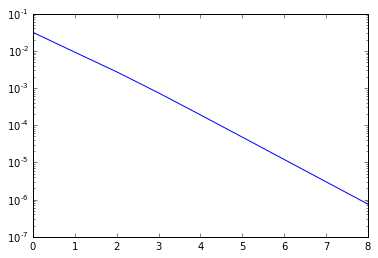

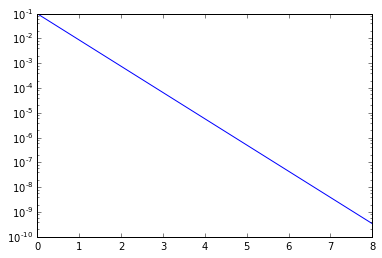

In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as LA
import scipy.sparse.linalg as spLA
import matplotlib.pyplot as plt

from project.poisson1d import Poisson1D
from project.helmholtz1d import Helmholtz1D
from project.weighted_jacobi import WeightedJacobi
# from project.gauss_seidel import GaussSeidel
from project.linear_transfer import LinearTransfer

from project.mymultigrid import MyMultigrid

ndofs = 1023

nlevels = int(np.log2(ndofs+1))

prob = Poisson1D(ndofs=ndofs)

mymg = MyMultigrid(ndofs=ndofs, nlevels=nlevels)
mymg.attach_transfer(LinearTransfer)
mymg.attach_smoother(WeightedJacobi,prob.A,omega=2.0/3.0)
# mymg.attach_smoother(GaussSeidel,prob.A)


def uex(arg):
    return -0.5 * arg**2 + 0.5*arg

res = 1

u = mymg.do_fmg_cycle_recursive(prob.rhs, 1, 2, 2, 0)
vh_list = mymg.get_vh_list()

err = []
x = 0
for i in range(len(vh_list)):
    l = np.array(vh_list[i])
    x = np.linspace(0, 1, l.size + 2)[1:-1]
    err.append(LA.norm(l - uex(x), np.inf))

print('Error(level):')
plt.semilogy(err)
plt.show()

k = 6
xvalues = np.array([(i+1) * prob.dx for i in range(prob.ndofs)])
u = np.sin(np.pi*k*xvalues)

err = []
for i in range(nlevels-1):
    u = mymg.do_v_cycle(u, prob.rhs, 2, 2, 0)
    err.append(LA.norm(u - uex(x), np.inf))

print('Error(#v-cycles):')
plt.semilogy(err)
plt.show()

### Fourier Reihen 

Sei $\{t_k\}_{-\infty}^{\infty}$ eine absolut summierbare Folge, d.h. $\sum_{k=-\infty}^{\infty}|t_k| < \infty$.
Sei desweiteren $f(\lambda) = \lim_{n \to \infty} \sum_{k=-n}^{n}t_k e^{ik\lambda}$.

1. Zeigen Sie, dass $S_n(\lambda) = \sum_{k=-n}^{n}t_k e^{ik\lambda}$ gleichmässig gegen $f(\lambda)$ konvergiert.
1. Folgern Sie, dass $f(\lambda)$ Riemann-integrierbar und beschränkt auf $[0,2\pi]$ ist.
1. Finden Sie mithilfe der inversen Fouriertransformation eine Darstellung von $t_k$ unter Verwendung von $f(\lambda)$.

Wir nennen $f(\lambda)$ eine Funktion der *Wiener Klasse*.


### Über Toeplitz-Matrizen (Teil 1)
Eine Matrix nennt man eine Toeplitz-Matrix falls die Werte auf der Hauptdiagonale und allen Nebendiagonalen konstant sind. Mithilfe einer Funktion der Wiener Klasse $f(\lambda)$ lässt sich die Klasse der Toeplitz-Matrizen
$$ T_n(f) = \{\frac{1}{2 \pi} \int_0^{2\pi} f(\lambda) e^{-i(k-j)\lambda} \mathrm{d}\lambda ; k,j = 0,1,\ldots,n-1\}$$
konstruieren.

1. Welches $f(\lambda)$ und $n$ generiert den zentrierte Finite-Differenzen-Operator 2. Ordnung des Laplace-Operators?
1. Zeigen Sie, dass $T_n(f(\lambda))$ genau dann hermitesch ist wenn $f(\lambda)$ eine reellwertige Funktion ist.
1. Sei $f(\lambda)$ reellwertig und begrenzt durch $m_f \leq f(\lambda) \leq M_f$. Beweisen Sie mithilfe des Rayleigh Koeffizienten, dass für die Eigenwerte $\tau_{n,k}$ von $T_n(f)$ gilt 
    $m_f\leq\tau_{n,k}\leq M_f$.
1. Zeigen Sie für nicht-hermitesche $T_n(f)$, dass die Ungleichung $\| T_n(f) \| \leq M_{|f_r|}+M_{|f_i|} \leq 2 M_{|f|}$ gilt, wobei $f(\lambda) = f_r(\lambda) + i f_i(\lambda)$ mit den reellwertigen Funktionen $f_i,f_r$ aus der Wiener Klasse.

Tipp: Nutzen Sie den Satz von Parseval für $x^* \cdot x$.
